In [8]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np 
from PIL import Image

In [5]:
img = cv2.imread("Main_Image.webp")
background_img = cv2.imread("Background_Image.jpeg")

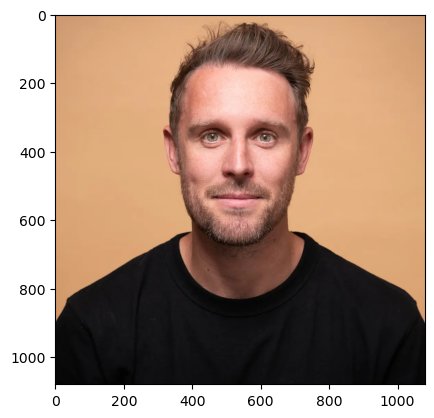

In [4]:
plt.imshow(img[:,:,::-1])

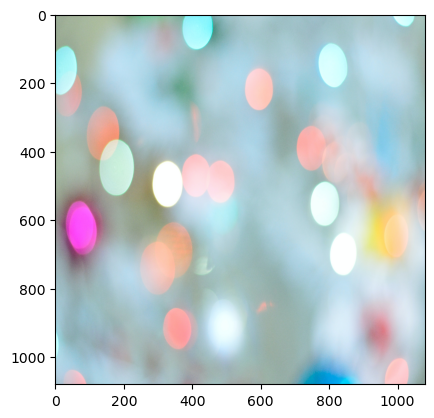

In [11]:
plt.imshow(background_img[:,:,::-1])

In [7]:
img.shape

(1080, 1080, 3)

In [10]:
background_img.shape

(1080, 1080, 3)

In [9]:
background_img = cv2.resize(background_img, (img.shape[1], img.shape[0]))

In [12]:
mp_selfie_segmentation = mediapipe.solutions.selfie_segmentation
selfie_segmentation = mp_selfie_segmentation.SelfieSegmentation()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [13]:
results = selfie_segmentation.process(img)

In [14]:
segmentation_mask = results.segmentation_mask

In [16]:
segmentation_mask.shape

(1080, 1080)

In [17]:
img.shape

(1080, 1080, 3)

In [18]:
segmentation_mask

array([[2.19814484e-36, 2.19814484e-36, 1.99461299e-36, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.19814484e-36, 2.19814484e-36, 1.99461299e-36, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.38249315e-29, 1.38249315e-29, 1.25448456e-29, ...,
        5.03069848e-38, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]], dtype=float32)

In [36]:
threshold = 0.6
condition = np.stack((segmentation_mask, ) * 3, axis = -1) > threshold

# Virtual Background

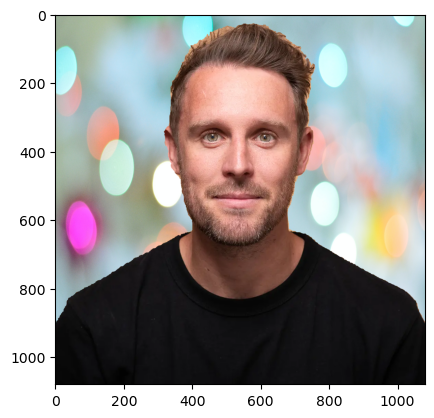

In [37]:
output_img = np.where(condition, img, background_img[:,:,::-1])
plt.imshow(output_img)

# Blur Background

In [38]:
img = output_img.copy()

In [39]:
blurred_img = cv2.GaussianBlur(img, (55, 55), 0)

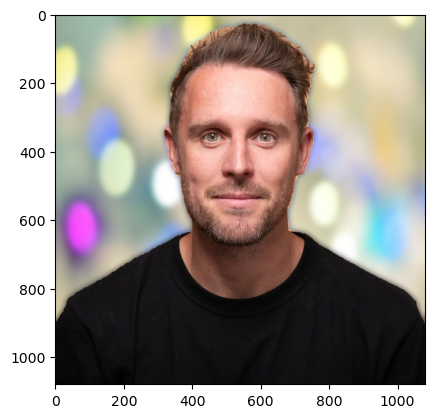

In [40]:
output_img = np.where(condition, img, blurred_img[:,:,::-1])
plt.imshow(output_img)

In [4]:
def gradient_image(width, height, colors):
    # Create an image with a linear gradient from the colors
    image = np.zeros((height, width, 3), dtype=np.uint8)
    colors = [np.array(color, dtype=np.uint8) for color in colors]
    num_colors = len(colors)
    for y in range(height):
        fraction = y / height
        color_index = int(fraction * (num_colors - 1))
        color = (1.0 - fraction) * colors[color_index] + fraction * colors[color_index + 1]
        color = color.astype(np.uint8)
        image[y] = color
    # Convert the image to a PIL image and return it
    return Image.fromarray(image)

In [5]:
bg_image = gradient_image(1280, 720, [(255,0,0), (255,128,0), (255,255,0), (0,128,0), (0,0,255), (75,0,130), (238,130,238)])

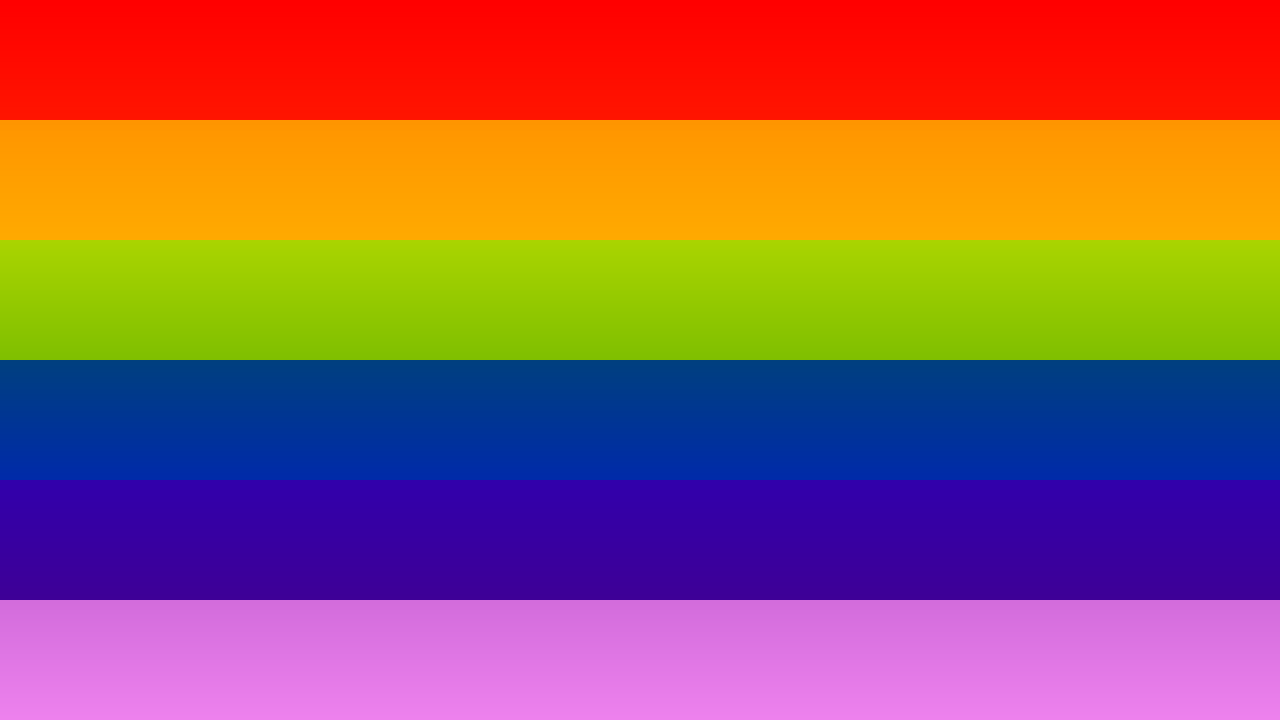

In [6]:
bg_image